[Kaggle](https://www.kaggle.com/datasets/ahsan81/used-handheld-device-data)

### Context
The used and refurbished device market has grown considerably over the past decade as it provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. Here is a sample dataset of normalized used and new pricing data of refurbished / used devices.

### Objective
The objective is to do Exploratory Data Analytics and apply Linear Regression to create a model which can help in pricing of such devices.

### Metadata
- **device_brand:** Name of manufacturing brand
- **os:** OS on which the device runs
- **screen_size:** Size of the screen in cm
- **4g:** Whether 4G is available or not
- **5g:** Whether 5G is available or not
- **front_camera_mp:** Resolution of the rear camera in megapixels
- **back_camera_mp:** Resolution of the front camera in megapixels
- **internal_memory:** Amount of internal memory (ROM) in GB
- **ram:** Amount of RAM in GB
- **battery:** Energy capacity of the device battery in mAh
- **weight:** Weight of the device in grams
- **release_year:** Year when the device model was released
- **days_used:** Number of days the used/refurbished device has been used
- **normalized_new_price:** Normalized price of a new device of the same model
- **normalized_used_price (TARGET):** Normalized price of the used/refurbished device

In [1]:
# from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from matplotlib import pyplot as plt

import pandas as pd
import seaborn as sns

In [2]:
sns.set_theme()
sns.set(rc={'figure.figsize': (8, 8)})

In [3]:
df = pd.read_csv('used_device_data.csv')

In [4]:
df.head()

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [5]:
df.shape

(3454, 15)

In [6]:
df.duplicated().any()

False

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   rear_camera_mp         3275 non-null   float64
 6   front_camera_mp        3452 non-null   float64
 7   internal_memory        3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [8]:
df.describe()

,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454.000000,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,4.364712,5.233107
std,3.805280,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,0.588914,0.683637
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,6.619433,7.847841


## Analysis

1) **Device Brand Distribution**<br>
    1.1. OS Analysis for *"Others"* Devices Brand
2) **OS Distribution**
3) **4G Distribution**<br>
    3.1. Release Year for Devices Without 4G
4) **5G Distribution**
5) **Cellular Network Technology vs. Pricing**
6) **Pearson's Correlation Coefficient Analysis**

### 1. Device Brand Distribution

*en*<br>
Visually, most device brands run on *Android*.<br>
*Samsung, Huawei and LG* compose the top 3 brands on the dataset.<br>
But there is a big percentage on *"Others"* category.

*pt*<br>
Visualmente, vemos que a maioria dos dispositivos rodam em *Android*.<br>
*Samsung, Huawei and LG* compõem o top 3 marcas no conjunto de dados.<br>
Porém há um percentual elevado em *"Others"*.

In [9]:
df['device_brand'].value_counts(normalize=True).round(4) * 100

Others        14.53
Samsung        9.87
Huawei         7.27
LG             5.82
Lenovo         4.95
ZTE            4.05
Xiaomi         3.82
Oppo           3.73
Asus           3.53
Alcatel        3.50
Micromax       3.39
Vivo           3.39
Honor          3.36
HTC            3.18
Nokia          3.07
Motorola       3.07
Sony           2.49
Meizu          1.80
Gionee         1.62
Acer           1.48
XOLO           1.42
Panasonic      1.36
Realme         1.19
Apple          1.13
Lava           1.04
Celkon         0.96
Spice          0.87
Karbonn        0.84
Coolpad        0.64
BlackBerry     0.64
Microsoft      0.64
OnePlus        0.64
Google         0.43
Infinix        0.29
Name: device_brand, dtype: float64

<AxesSubplot: xlabel='Percent', ylabel='device_brand'>

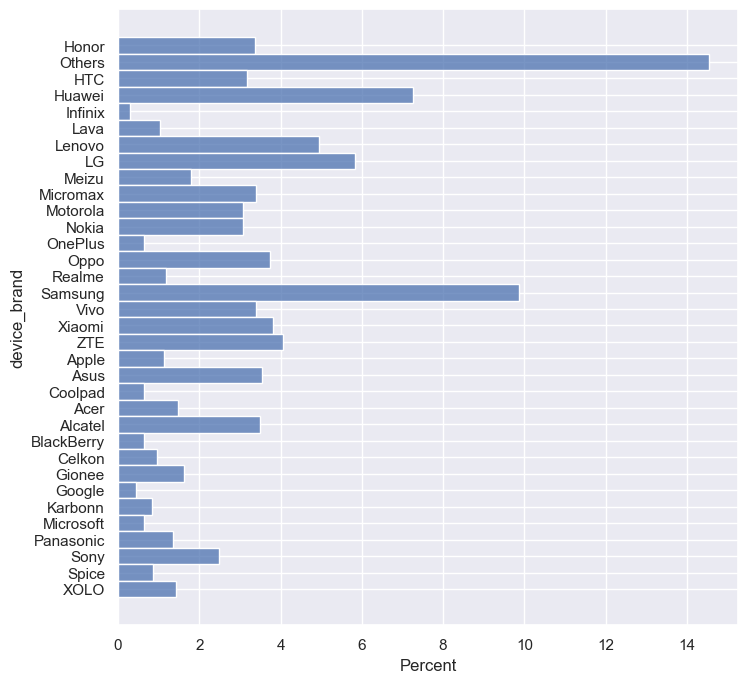

In [10]:
# histplot: https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot


sns.histplot(data=df, y='device_brand', stat='percent')

#### 1.1.  OS Analysis for *"Others"* Devices Brand

*en*: Most devices of type *"Others"* runs  on *Android*

*pt*: A maior parte do dispositivos do tipo Others rodam o sistema operacional Android

In [11]:
df.query('device_brand == "Others"')['os'].value_counts()

Android    465
Others      28
Windows      9
Name: os, dtype: int64

Text(0.5, 0, 'Percent')

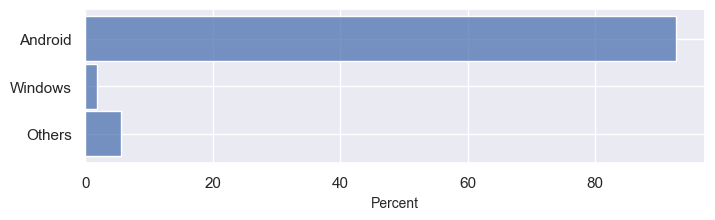

In [12]:
# histplot: https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set.html#matplotlib.axes.Axes.set


ax = sns.histplot(data=df.query('device_brand == "Others"'), y='os', stat='percent', shrink=.95)

ax.figure.set_size_inches(8, 2)
ax.set_ylabel(ylabel='', fontdict={'size': 10})
ax.set_xlabel(xlabel='Percent', fontdict={'size': 10})

### 2. OS Distribution

*en*: Most devices runs *Android* on the data analysed.

*pt*: Vimos que a maior parte dos dispositivos rodam Android nos dados analisados.

In [13]:
df['os'].value_counts(normalize=True).round(4) * 100

Android    93.05
Others      3.97
Windows     1.94
iOS         1.04
Name: os, dtype: float64

<AxesSubplot: ylabel='os'>

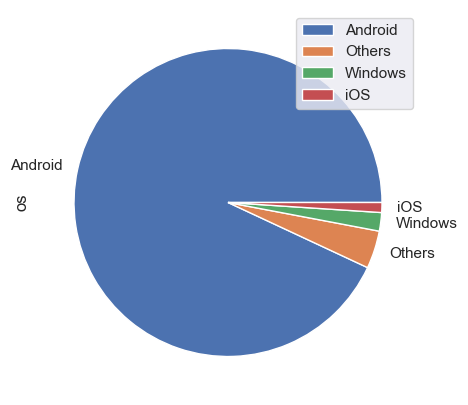

In [14]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html

pd.DataFrame(df['os'].value_counts(normalize=True)).plot(y='os', kind='pie', figsize=(5, 5))

### 3. 4G Distribution

*en*: Approximately 70% of the devices support 4G.

*pt*: Aproximadamente 70% dos dispositivos possuem 4G nos dados analisados.

In [15]:
df['4g'].value_counts(normalize=True).round(4) * 100

yes    67.6
no     32.4
Name: 4g, dtype: float64

Text(0.5, 0, '4G')

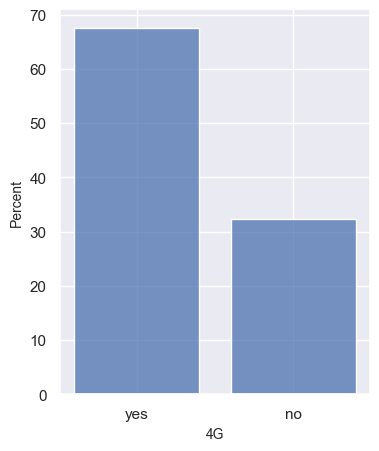

In [16]:
# histplot: https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set.html#matplotlib.axes.Axes.set


ax = sns.histplot(data=df, x='4g', stat='percent', shrink=.8)

ax.figure.set_size_inches(4, 5)
ax.set_ylabel(ylabel='Percent', fontdict={'size': 10})
ax.set_xlabel(xlabel='4G', fontdict={'size': 10})

#### 3.1.  Release Year for Devices Without 4G

*en*: On this dataset, few  devices released after 2016 doesn't support 4G.

*pt*: Nos dados analisados, poucos dispositivos lançados a partir de 2016 não suportam 4G.

In [17]:
df.query('`4g` == "no"')['release_year'].value_counts()

2013    473
2014    414
2015    162
2016     30
2017     13
2019     10
2020      9
2018      8
Name: release_year, dtype: int64

Text(0.5, 0, 'Release Year')

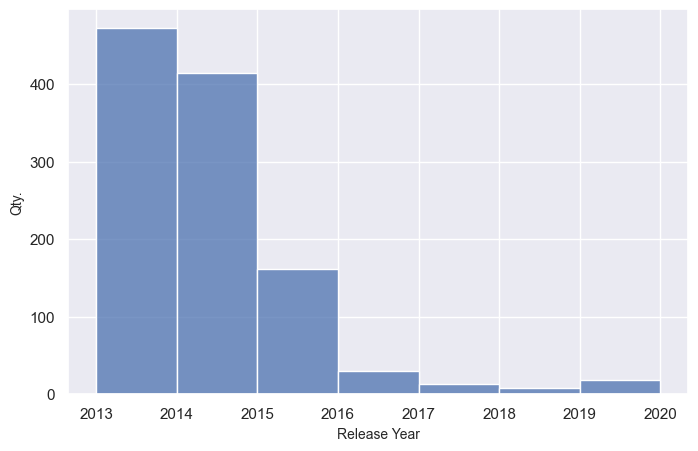

In [18]:
# histplot: https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set.html#matplotlib.axes.Axes.set


ax = sns.histplot(data=df.query('`4g` == "no"'), x='release_year', binwidth=1)

ax.figure.set_size_inches(8, 5)
ax.set_ylabel(ylabel='Qty.', fontdict={'size': 10})
ax.set_xlabel(xlabel='Release Year', fontdict={'size': 10})

In [19]:
# en: Some cases were analysed manually (research) in order to validate the data
# pt: Alguns casos foram analisados manualmente (pesquisa) para validar os dispositivos


df.query('release_year >= 2019 and `4g` == "no"').reset_index()

,index,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,67,Lenovo,Android,25.43,no,no,8.0,5.0,64.00,4.00,7000.0,580.0,2019,419,5.214881,5.775141
1,113,Nokia,Others,5.18,no,no,0.3,0.0,0.10,0.03,1020.0,90.5,2020,272,2.910174,3.399863
2,114,Nokia,Others,5.18,no,no,0.3,0.0,0.06,NaN,1020.0,91.3,2020,288,2.729159,2.911263
3,116,Nokia,Others,5.18,no,no,0.3,0.0,0.06,0.02,1200.0,88.2,2020,266,3.370738,3.699077
4,214,ZTE,Android,12.70,no,no,8.0,5.0,16.00,1.00,2000.0,144.0,2019,385,3.931433,4.102643
5,286,Lenovo,Android,25.43,no,no,8.0,5.0,64.00,4.00,7000.0,580.0,2019,429,5.053759,5.768071
6,332,Nokia,Others,5.18,no,no,0.3,0.0,0.06,0.03,1020.0,90.5,2020,322,2.519308,3.386422
7,333,Nokia,Others,5.18,no,no,0.3,0.0,0.10,0.03,1020.0,91.3,2020,148,2.564949,3.011606
8,335,Nokia,Others,5.18,no,no,0.3,0.0,0.10,NaN,1200.0,88.2,2020,327,3.062924,3.689129
9,379,Others,Android,20.32,no,no,0.3,2.0,16.00,1.00,3600.0,330.0,2020,290,4.053523,4.488412


Text(0, 0.5, 'Qty')

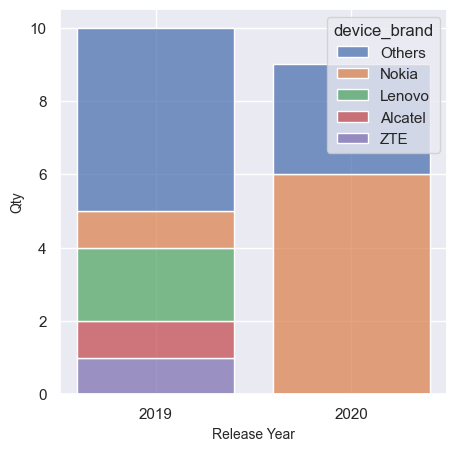

In [20]:
# histplot: https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set.html#matplotlib.axes.Axes.set


ax = sns.histplot(data=df.query('release_year >= 2019 and `4g` == "no"').astype({'release_year': 'str'}), 
                  x='release_year', 
                  shrink=.8,
                  hue='device_brand',
                  hue_order=['Others', 'Nokia', 'Lenovo', 'Alcatel', 'ZTE'],
                  multiple='stack')

ax.figure.set_size_inches(5, 5)
ax.set_xlabel(xlabel='Release Year', fontdict={'size': 10})
ax.set_ylabel(ylabel='Qty', fontdict={'size': 10})

### 4. 5G Distribution

*en*: Approximately 96% of the devices doesn't support 5G.

*pt*: Aproximadamente 96% dos dispositivos analisados não possuem 5G

In [21]:
df['5g'].value_counts(normalize=True).round(4) * 100

no     95.6
yes     4.4
Name: 5g, dtype: float64

In [22]:
# Validação da disponibilidade do 4g em dispositivos com 5g


df.query('`5g` == "yes" and `4g` == "no"').shape

(0, 15)

Text(0.5, 0, '5G')

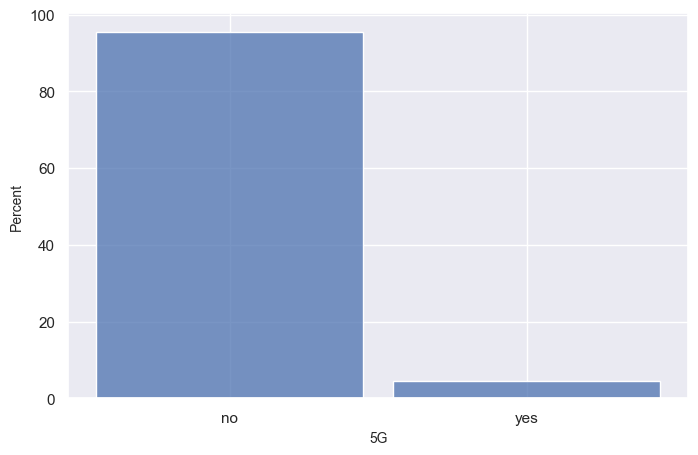

In [23]:
# histplot: https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set.html#matplotlib.axes.Axes.set


ax = sns.histplot(data=df, x='5g', stat='percent', shrink=.9)

ax.figure.set_size_inches(8, 5)
ax.set_ylabel(ylabel='Percent', fontdict={'size': 10})
ax.set_xlabel(xlabel='5G', fontdict={'size': 10})

### 5. Cellular Network Technology vs. Pricing

*en*<br>
Cellular network technologies (4G, 5G) has direct impact on pricing. 

*pt*<br>
As tecnologias de rede celular têm impacto direto no preço.

In [24]:
# GroupBy


df.groupby(['4g', '5g']).agg({'normalized_used_price': ['mean', 'min', 'max']})

normalized_used_price                    
                         mean       min       max
4g  5g                                           
no  no               3.896332  1.536867  5.494953
yes no               4.544868  2.667228  6.158969
    yes              5.225482  4.602667  6.619433

In [25]:
# Pivot Table


df.pivot_table(index='4g', columns='5g', values='normalized_used_price', aggfunc='mean')

5g,no,yes
4g,,
no,3.896332,NaN
yes,4.544868,5.225482


[Text(0.5, 0, 'max')]

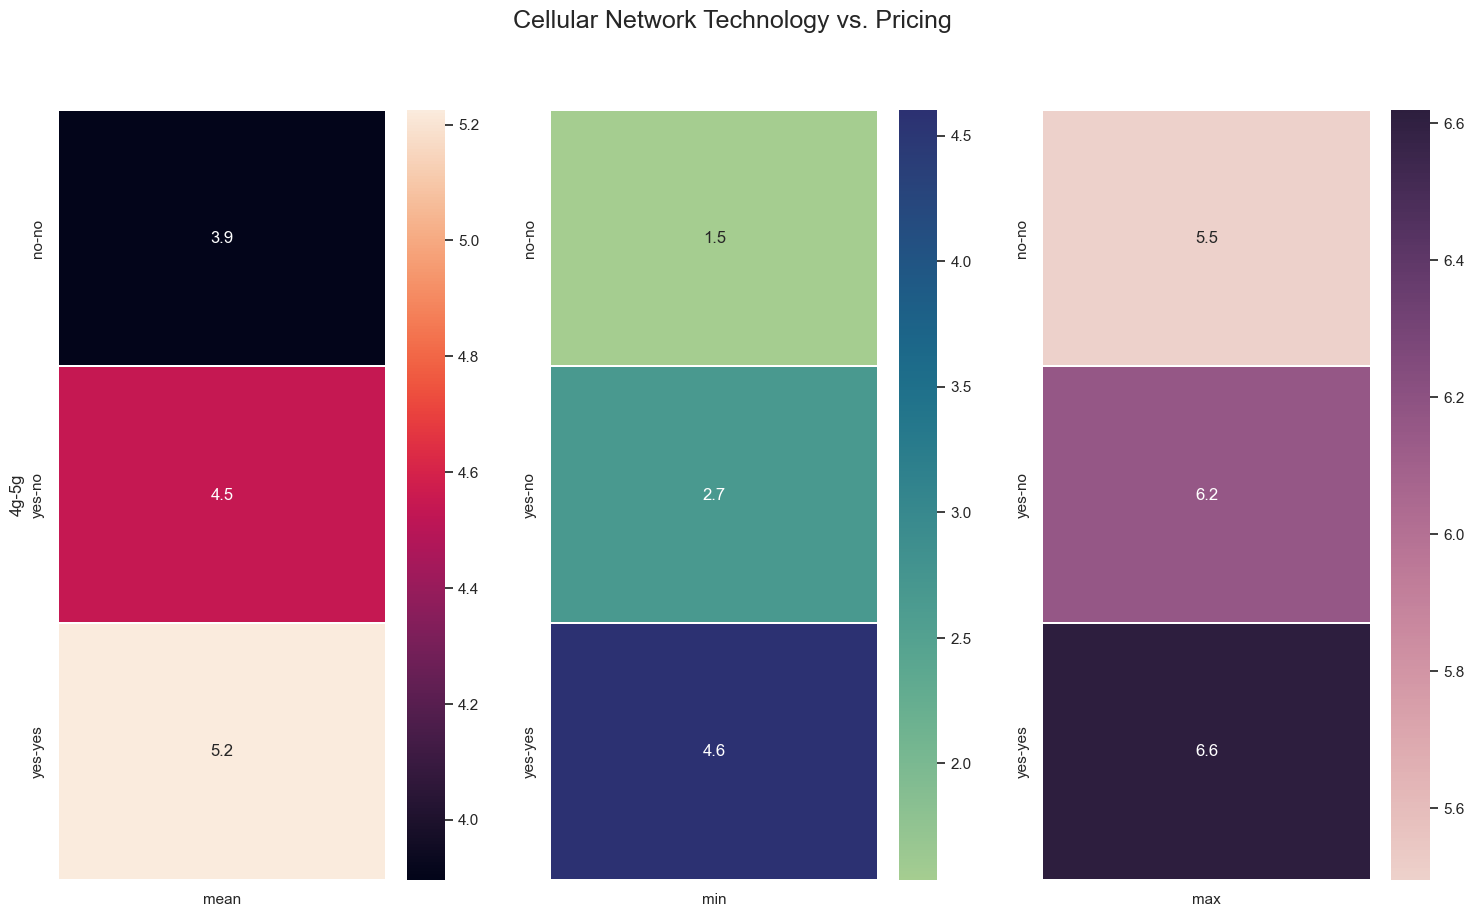

In [26]:
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set.html#matplotlib.axes.Axes.set
# https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8


fig, axes = plt.subplots(1, 3, figsize=(18, 10))
fig.suptitle('Cellular Network Technology vs. Pricing', fontsize=18)

ax1 = sns.heatmap(ax=axes[0], data=df.groupby(['4g', '5g']).agg({'normalized_used_price': 'mean'}), annot=True, linewidth=.1)
ax2 = sns.heatmap(ax=axes[1], data=df.groupby(['4g', '5g']).agg({'normalized_used_price': 'min'}), annot=True, linewidth=.1, cmap='crest')
ax3 = sns.heatmap(ax=axes[2], data=df.groupby(['4g', '5g']).agg({'normalized_used_price': 'max'}), annot=True, linewidth=.1, cmap=sns.cubehelix_palette(as_cmap=True))

ax1.set_xlabel('')
ax1.set_xticklabels(['mean'], rotation=0)

ax2.set_ylabel('')
# ax2.set_yticklabels('')
ax2.set_xticklabels(['min'], rotation=0)

ax3.set_ylabel('')
# ax3.set_yticklabels('')
ax3.set_xticklabels(['max'], rotation=0)

### 6. Pearson's Correlation Coefficient Analysis

*en*<br>
Correlation analysis comparing technical specifications and market information *vs.* the device's used price.<br>
Variables such as *screen size*, *camera mp*, *ram*, *battery*, *realease year* and *new price* presented significative (> 0.5) and positive coefficients.

*pt*<br>
Análise da correlação ao comparar as especificações técnicas e de mercado com o preço do dispositivo usado.<br>
As variáveis *tamanho da tela*, *mp da camera*, *ram*, *bateria*, *ano de lançamento* e *preço de um novo* apresentaram coeficientes significativos (> 0.5) e positivos.

In [27]:
df_corr = df[[
    'screen_size',
    'rear_camera_mp', 
    'front_camera_mp',
    'internal_memory', 
    'ram', 
    'battery', 
    'release_year', 
    'days_used', 
    'normalized_new_price',
    'normalized_used_price', 
]].corr()

df_corr

,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,release_year,days_used,normalized_new_price,normalized_used_price
screen_size,1.000000,0.150316,0.271640,0.071291,0.274449,0.813533,0.364223,-0.291723,0.460889,0.614785
rear_camera_mp,0.150316,1.000000,0.429264,0.018766,0.260802,0.248563,0.353728,-0.144672,0.541655,0.587302
front_camera_mp,0.271640,0.429264,1.000000,0.296426,0.477411,0.369709,0.690942,-0.552636,0.475479,0.608074
internal_memory,0.071291,0.018766,0.296426,1.000000,0.122496,0.117736,0.235429,-0.242712,0.195992,0.190993
ram,0.274449,0.260802,0.477411,0.122496,1.000000,0.280740,0.314203,-0.280066,0.532056,0.520289
battery,0.813533,0.248563,0.369709,0.117736,0.280740,1.000000,0.488660,-0.370895,0.470754,0.613619
release_year,0.364223,0.353728,0.690942,0.235429,0.314203,0.488660,1.000000,-0.750390,0.303689,0.509790
days_used,-0.291723,-0.144672,-0.552636,-0.242712,-0.280066,-0.370895,-0.750390,1.000000,-0.216625,-0.358264
normalized_new_price,0.460889,0.541655,0.475479,0.195992,0.532056,0.470754,0.303689,-0.216625,1.000000,0.834496
normalized_used_price,0.614785,0.587302,0.608074,0.190993,0.520289,0.613619,0.509790,-0.358264,0.834496,1.000000


In [28]:
# Selecting the desired comparations
# Selecionando as comparações desejadas


df_corr.iloc[0:9, -1:]

,normalized_used_price
screen_size,0.614785
rear_camera_mp,0.587302
front_camera_mp,0.608074
internal_memory,0.190993
ram,0.520289
battery,0.613619
release_year,0.509790
days_used,-0.358264
normalized_new_price,0.834496


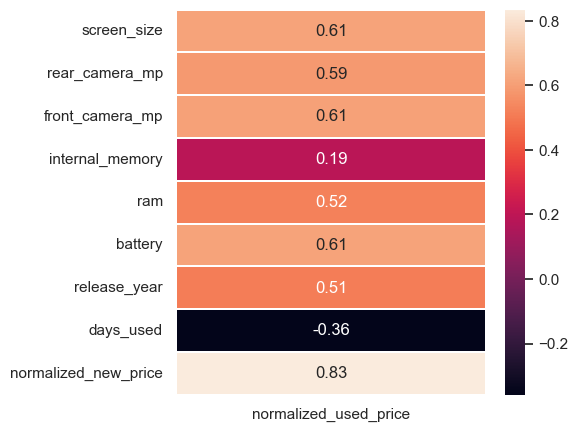

In [29]:
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set.html#matplotlib.axes.Axes.set


ax = sns.heatmap(df_corr.iloc[0:9, -1:], annot=True, linewidth=.1)
ax.figure.set_size_inches(5, 5)

## Linear Regression

1) **Test 01**: Using All Variables
2) **Test 02**: Removing Some Variables
3) **Test 03**: Using Only the Release Price Variable

*en*<br>
The first two tests performed similarly, which means that the removal of the internal memory and days used variables did not affect the predicted values.<br>
Lastly, on third test was possible to observe that only the use of the most correlation variable (release price) produced the worst results when compared to the first two tests.

*pt*<br>
Vimos que os dois primeiros testes performaram de forma semelhante, ou seja, as variáveis de memória interna e dias de uso não demostraram ter um impacto nos valores previstos.<br>
Por fim, no terceiro teste foi possível observar que apenas a variável de maior correlação (valor de lançamento) produziu resultados piores quando comparado aos dois primeiros testes.

### Preprocessing

In [30]:
# Tratando NA: Removendo
# Original size: 3454


df.dropna(inplace=True)
df.shape

(3253, 15)

In [31]:
# Separando as variaveis: Dependentes e Independentes


X = df[[
    '4g',
    '5g',
    'screen_size',
    'rear_camera_mp', 
    'front_camera_mp',
    'internal_memory', 
    'ram', 
    'battery', 
    'release_year', 
    'days_used', 
    'normalized_new_price',
]].copy()

y = df['normalized_used_price'].copy()

In [32]:
# Preprocessing: Adding 4G and 5G binary columns


X['4g_binary'] = X['4g'].apply(lambda x: 0 if x == 'no' else 1)
X['5g_binary'] = X['5g'].apply(lambda x: 0 if x == 'no' else 1)

X.drop(['4g', '5g'], axis=1, inplace=True)

X

,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,release_year,days_used,normalized_new_price,4g_binary,5g_binary
0,14.50,13.0,5.0,64.0,3.0,3020.0,2020,127,4.715100,1,0
1,17.30,13.0,16.0,128.0,8.0,4300.0,2020,325,5.519018,1,1
2,16.69,13.0,8.0,128.0,8.0,4200.0,2020,162,5.884631,1,1
3,25.50,13.0,8.0,64.0,6.0,7250.0,2020,345,5.630961,1,1
4,15.32,13.0,8.0,64.0,3.0,5000.0,2020,293,4.947837,1,0
...,...,...,...,...,...,...,...,...,...,...,...
3447,15.27,8.0,7.0,64.0,4.0,3110.0,2019,208,6.287933,1,0
3450,15.24,13.0,8.0,128.0,8.0,4000.0,2018,541,6.251538,1,0
3451,15.80,13.0,5.0,32.0,3.0,4000.0,2020,201,4.528829,1,0
3452,15.80,13.0,5.0,32.0,2.0,4000.0,2020,149,4.624188,1,0


In [33]:
# Creating training and testing datasets


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=171)
print(f'Pct. of Training Dataset: {X_train.shape[0] / (X_train.shape[0] + X_test.shape[0])}')

Pct. of Training Dataset: 0.799877036581617


### Test 01: Using All Variables

In [34]:
# Training the Model


regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

# print(f'Intercept: {regr.intercept_}')
# print(f'Coefficients:\n {regr.coef_}')

pd.DataFrame({'feature': regr.feature_names_in_, 'coefficient': regr.coef_})

,feature,coefficient
0,screen_size,0.039949
1,rear_camera_mp,0.020259
2,front_camera_mp,0.011834
3,internal_memory,0.000018
4,ram,0.016756
5,battery,0.000009
6,release_year,0.023365
7,days_used,0.000036
8,normalized_new_price,0.430834
9,4g_binary,0.028044


In [35]:
# Testing the Model


pricing_y_pred = regr.predict(X_test)

In [36]:
# Checking the results


print(f'Mean Squared Error: {mean_squared_error(y_test, pricing_y_pred):2f}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, pricing_y_pred):2f}')
print(f'Coefficient of Retermination (R2): {r2_score(y_test, pricing_y_pred):2f}')

results_01 = pd.DataFrame({'price': y_test, 'predicted_price': pricing_y_pred, 'residuals': y_test - pricing_y_pred})
results_01.head()

Mean Squared Error: 0.053028
Mean Absolute Error: 0.178438
Coefficient of Retermination (R2): 0.842381


,price,predicted_price,residuals
296,4.720550,4.521566,0.198985
1,5.162097,4.980553,0.181544
40,4.997685,5.442498,-0.444813
1748,4.146621,3.976062,0.170559
370,4.955757,5.202606,-0.246849


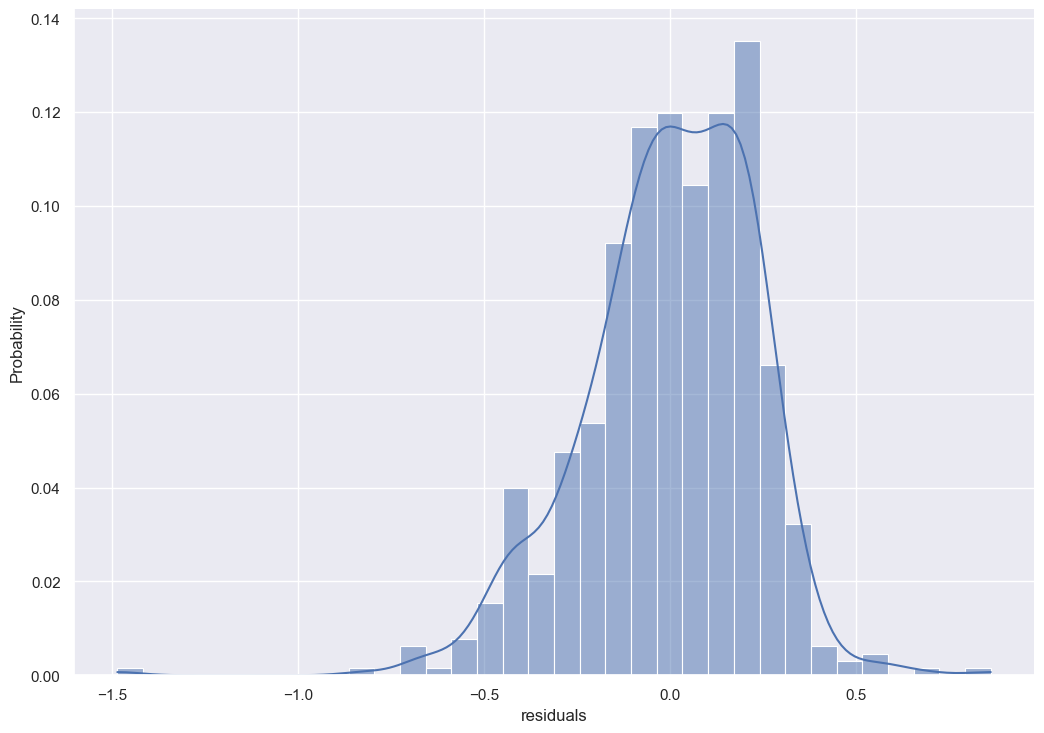

In [37]:
# https://seaborn.pydata.org/generated/seaborn.displot.html


ax = sns.displot(data=results_01, x='residuals', kde=True, stat='probability')
ax.figure.set_size_inches(12, 8)

### Test 02: Removing some variables

In [38]:
X=df[['4g',
      '5g',
      'screen_size',
      'rear_camera_mp', 
      'front_camera_mp', 
      'ram', 
      'battery', 
      'release_year', 
      'normalized_new_price',]].copy()

y=df['normalized_used_price'].copy()

In [39]:
# Preprocessing: Adding 4G and 5G binary columns


X['4g_binary'] = X['4g'].apply(lambda x: 0 if x == 'no' else 1)
X['5g_binary'] = X['5g'].apply(lambda x: 0 if x == 'no' else 1)

X.drop(['4g', '5g'], axis=1, inplace=True)

X

,screen_size,rear_camera_mp,front_camera_mp,ram,battery,release_year,normalized_new_price,4g_binary,5g_binary
0,14.50,13.0,5.0,3.0,3020.0,2020,4.715100,1,0
1,17.30,13.0,16.0,8.0,4300.0,2020,5.519018,1,1
2,16.69,13.0,8.0,8.0,4200.0,2020,5.884631,1,1
3,25.50,13.0,8.0,6.0,7250.0,2020,5.630961,1,1
4,15.32,13.0,8.0,3.0,5000.0,2020,4.947837,1,0
...,...,...,...,...,...,...,...,...,...
3447,15.27,8.0,7.0,4.0,3110.0,2019,6.287933,1,0
3450,15.24,13.0,8.0,8.0,4000.0,2018,6.251538,1,0
3451,15.80,13.0,5.0,3.0,4000.0,2020,4.528829,1,0
3452,15.80,13.0,5.0,2.0,4000.0,2020,4.624188,1,0


In [40]:
# Creating training and testing datasets


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=171)
print(f'Pct. of Training Dataset: {X_train.shape[0] / (X_train.shape[0] + X_test.shape[0]):2f}')

Pct. of Training Dataset: 0.799877


In [41]:
# Training the Model


regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [42]:
regr.feature_names_in_

array(['screen_size', 'rear_camera_mp', 'front_camera_mp', 'ram',
       'battery', 'release_year', 'normalized_new_price', '4g_binary',
       '5g_binary'], dtype=object)

In [43]:
# Testing the Model


pricing_y_pred = regr.predict(X_test)

In [44]:
# Checking the results


print(f'Mean Squared Error: {mean_squared_error(y_test, pricing_y_pred):2f}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, pricing_y_pred):2f}')
print(f'Coefficient of Retermination (R2): {r2_score(y_test, pricing_y_pred):2f}')

results_02 = pd.DataFrame({'price': y_test, 'predicted_price': pricing_y_pred, 'residuals': y_test - pricing_y_pred})
results_02.head()

Mean Squared Error: 0.053299
Mean Absolute Error: 0.178757
Coefficient of Retermination (R2): 0.841575


,price,predicted_price,residuals
296,4.720550,4.529859,0.190691
1,5.162097,4.978706,0.183390
40,4.997685,5.447907,-0.450221
1748,4.146621,3.968600,0.178021
370,4.955757,5.204527,-0.248770


### Test 03: Using only the realese price variable

In [45]:
X=df[['normalized_new_price']].copy()
y=df['normalized_used_price'].copy()

In [46]:
# Creating training and testing datasets


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=171)
print(f'Pct. of Training Dataset: {X_train.shape[0] / (X_train.shape[0] + X_test.shape[0]):2f}')

Pct. of Training Dataset: 0.799877


In [47]:
# Training the Model


regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [48]:
regr.feature_names_in_

array(['normalized_new_price'], dtype=object)

In [49]:
# Testing the Model


pricing_y_pred = regr.predict(X_test)

In [50]:
# Checking the results


print(f'Mean Squared Error: {mean_squared_error(y_test, pricing_y_pred):2f}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, pricing_y_pred):2f}')
print(f'Coefficient of Retermination (R2): {r2_score(y_test, pricing_y_pred):2f}')

results_03 = pd.DataFrame({'price': y_test, 'predicted_price': pricing_y_pred, 'residuals': y_test - pricing_y_pred})
results_03.head(10)

Mean Squared Error: 0.103364
Mean Absolute Error: 0.254160
Coefficient of Retermination (R2): 0.692764


,price,predicted_price,residuals
296,4.720550,4.398041,0.322510
1,5.162097,4.558244,0.603852
40,4.997685,4.982553,0.015132
1748,4.146621,4.282037,-0.135417
370,4.955757,4.859096,0.096661
3041,4.579442,4.288204,0.291238
3337,5.122177,4.695688,0.426489
476,4.338728,3.891028,0.447700
1814,4.156693,4.359010,-0.202316
385,4.424248,3.899656,0.524592


In [51]:
# Mean Squared Error: 0.053028
# Mean Absolute Error: 0.178438
# Coefficient of Retermination (R2): 0.842381
    
# Mean Squared Error: 0.053299
# Mean Absolute Error: 0.178757
# Coefficient of Retermination (R2): 0.841575
    
# Mean Squared Error: 0.103364
# Mean Absolute Error: 0.254160
# Coefficient of Retermination (R2): 0.692764
    

pd.DataFrame(data={'Test': ['01', '02', '03'], 
                   'Mean Squared Error': [0.053028, 0.053299, 0.103364], 
                   'Mean Absolute Error': [0.178438, 0.178757, 0.254160], 
                   'R2': [0.842381, 0.841575, 0.692764]}, index=[0, 1, 2])

,Test,Mean Squared Error,Mean Absolute Error,R2
0,01,0.053028,0.178438,0.842381
1,02,0.053299,0.178757,0.841575
2,03,0.103364,0.254160,0.692764
